In [9]:
%matplotlib inline
import numpy as np
import PIL
from PIL import Image
import os
from os import path
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [110]:
# Chargement du jeu de données :
def load_signaux(dir):
    img_list = []
    class_counter = 0
    class_list = []
    for i in os.listdir(dir):
        if (path.isdir(path.join(dir, i))):
            for j in os.listdir(path.join(dir, i)):
                if (j.endswith('.ppm')):
                    class_list.append(class_counter)
                    img_list.append(np.array(Image.open(os.path.join(os.path.join(dir, i), j)).resize((28, 28))))
            class_counter += 1
    return np.array(img_list), np.array(class_list)


In [111]:
#chargement des données en train/ test
(X_train_full, y_train_full) = load_signaux("Train")
(X_test, y_test) = load_signaux("Test")

In [112]:
X_train,  X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [113]:
# Normalisation de l'input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
X_valid =X_valid/255.0


In [114]:
#traitement de l'output 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

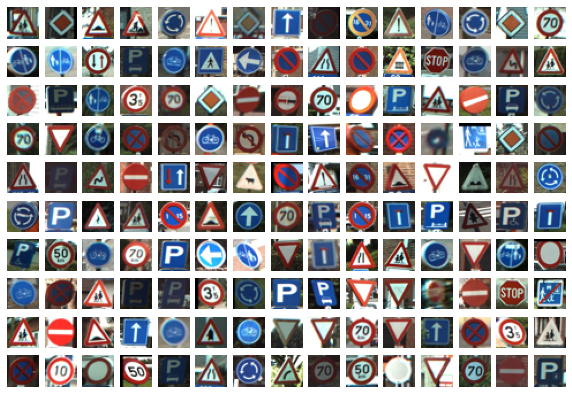

In [115]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

In [116]:
y_train.shape

(3431, 62)

In [117]:
X_train.shape

(3431, 28, 28, 3)

In [118]:
# Creationdu modele
model_to_learn = Sequential()
model_to_learn.add(Conv2D(28, (3, 3), input_shape=(28, 28, 3), padding='same', activation='relu'))
model_to_learn.add(Dropout(0.2))
model_to_learn.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
model_to_learn.add(MaxPooling2D(pool_size=(2, 2)))
model_to_learn.add(Flatten())
model_to_learn.add(Dense(512, activation='relu'))
model_to_learn.add(Dropout(0.5))
model_to_learn.add(Dense(62, activation='softmax'))
# Compile model
epochs= 6
lrate= 0.001
model_to_learn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#
print(model_to_learn.summary())




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 28)        784       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 28)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 28)        7084      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5488)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2810368   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)              

In [119]:
history = model_to_learn.fit(X_train, y_train, epochs=6, validation_data=(X_valid, y_valid))

Epoch 1/6
108/108 [==============================] - 8s 69ms/step - loss: 3.1670 - accuracy: 0.2731 - val_loss: 1.2075 - val_accuracy: 0.7413ETA: 3s - loss: 3.589 -
Epoch 2/6
108/108 [==============================] - 8s 71ms/step - loss: 1.0773 - accuracy: 0.7263 - val_loss: 0.5205 - val_accuracy: 0.8890
Epoch 3/6
108/108 [==============================] - 8s 75ms/step - loss: 0.4641 - accuracy: 0.8853 - val_loss: 0.3266 - val_accuracy: 0.9257
Epoch 4/6
108/108 [==============================] - 7s 69ms/step - loss: 0.2704 - accuracy: 0.9234 - val_loss: 0.2157 - val_accuracy: 0.9449
Epoch 5/6
108/108 [==============================] - 8s 71ms/step - loss: 0.1983 - accuracy: 0.9429 - val_loss: 0.1521 - val_accuracy: 0.9554uracy: 
Epoch 6/6
108/108 [==============================] - 7s 69ms/step - loss: 0.1341 - accuracy: 0.9584 - val_loss: 0.1287 - val_accuracy: 0.9650s - ETA: 0s - los


In [120]:
model_to_learn.evaluate(X_valid, y_valid)

36/36 [==============================] - 1s 13ms/step - loss: 0.1287 - accuracy: 0.9650


[0.1287376433610916, 0.9650349617004395]

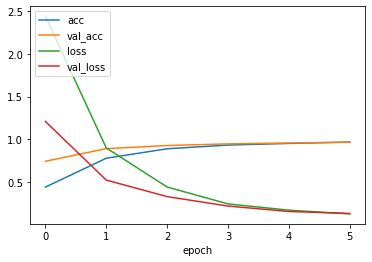

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc','loss', 'val_loss'], loc='upper left')
plt.show()


In [64]:
model_to_learn.save('./Best_model_20.h5')

In [10]:
from keras.models import load_model


data_training_dict={
"0":"00000/01153_00000.ppm",
"1":"00001/00025_00000.ppm",
"2":"00002/00270_00000.ppm",
"3":"00003/00207_00000.ppm",
"4":"00004/00145_00000.ppm",
"5":"00005/00261_00000.ppm",
"6":"00006/00147_00000.ppm",
"7":"00007/00014_00000.ppm",
"8":"00008/00046_00000.ppm",
"9":"00009/00141_00000.ppm",
"10":"00010/00240_00000.ppm",
"11":"00011/00271_00000.ppm",
"12":"00012/01564_00001.ppm",
"13":"00013/00138_00000.ppm",
"14":"00014/00208_00000.ppm",
"15":"00015/00331_00000.ppm",
"16":"00016/00230_00000.ppm",
"17":"00017/00002_00000.ppm",
"18":"00018/00008_00000.ppm",
"19":"00019/00006_00000.ppm",
"20":"00020/00230_00000.ppm",
"21":"00021/00375_00000.ppm",
"22":"00022/00020_00000.ppm",
"23":"00023/00465_00000.ppm",
"24":"00024/00300_00000.ppm",
"25":"00025/00469_00000.ppm",
"26":"00026/00173_00000.ppm",
"27":"00027/00267_00000.ppm",
"28":"00028/00019_00000.ppm",
"29":"00029/00021_00000.ppm",
"30":"00030/00034_00000.ppm",
"31":"00031/00050_00000.ppm",
"32":"00032/00001_00000.ppm",
"33":"00033/00339_00000.ppm",
"34":"00034/00153_00000.ppm",
"35":"00035/00020_00000.ppm",
"36":"00036/00564_00000.ppm",
"37":"00037/00099_00001.ppm",
"38":"00038/00004_00000.ppm",
"39":"00039/00291_00000.ppm",
"40":"00040/00022_00000.ppm",
"41":"00041/00084_00000.ppm",
"42":"00042/00070_00000.ppm",
"43":"00043/00071_00000.ppm",
"44":"00044/00161_00000.ppm",
"45":"00045/00012_00000.ppm",
"46":"00046/00090_00000.ppm",
"47":"00047/00010_00000.ppm",
"48":"00048/00091_00000.ppm",
"49":"00049/00258_00000.ppm",
"50":"00050/00320_00000.ppm",
"51":"00051/00470_00000.ppm",
"52":"00052/00476_00000.ppm",
"53":"00053/00093_00000.ppm",
"54":"00054/00007_00000.ppm",
"55":"00055/00191_00000.ppm",
"56":"00056/00140_00000.ppm",
"57":"00057/00064_00000.ppm",
"58":"00058/00107_00000.ppm",
"59":"00059/00137_00000.ppm",
"60":"00060/00209_00000.ppm",
"61":"00061/00032_00000.ppm"}


In [20]:
from PIL import Image

def open_ppm_img(img):
    test_predict = Image.open(img).resize((28, 28))
    test_predict = np.array(test_predict).astype("float32")/255.0
    test_predict = test_predict.reshape(1, 28, 28, 3)
    return test_predict

def predict_load_model(to_predict):
    model_loaded = tf.keras.models.load_model("Best_model_20.h5")
    prediction = model_loaded.predict(to_predict)
    
    proba_array = prediction.argsort()
    best_guess = proba_array[0][-1]
    print(proba_array)
    print(prediction[0][proba_array[0][-1]]*100,"%")
    return best_guess


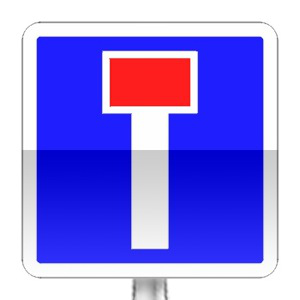

In [23]:

img_file="pann1.jpg"
Image.open(img_file)

[[43 26 24 17 42 16 23 25  4  2 20  1 31 27 37  8 11 29 13  3 10 32  0 41
  60  7 30 50 15 35 28 48 45 57  5 33 61 52 18 39  9 12 40 44 38 21 58  6
  59 55 22 56 51 19 36 46 14 49 34 47 53 54]]
98.85349869728088 %
54


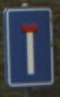

In [24]:
import numpy as np
test = open_ppm_img(img_file)
res_pre=predict_load_model(test)
print(res_pre)
Image.open("Train/"+data_training_dict[str(res_pre)])

In [83]:
from keras.models import model_from_json
# Architecture du modele au format JSON
model_json = model_to_learn.to_json()
with open("model_best1.json", "w") as json_file:
    json_file.write(model_json)
# Archivage des coefficient de l'entrainement au format HDF5
model_to_learn.save_weights("model_best1.h5")

In [84]:
# lecture du fichier json et creation du modèle
fichier = open('model_best1.json', 'r')
recup_model_json = fichier.read()
fichier.close()
mon_modele = model_from_json(recup_model_json)
# Chargement des coefficients dans le modele
#mon_modele.load_weights("model_best1.h5")